In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline
pd.options.display.max_rows = 999
from ast import literal_eval

In [2]:
def clean(x):
    return literal_eval(x)

In [3]:
accre_jobs_piped = pd.read_csv('../data/accre_jobs_cleaned.csv', converters={'node_numbers': clean})

# Stan 
    Question  1    Which partition nodes show high number of failures 

In [4]:
accre_jobs_piped['failure'] = np.where(accre_jobs_piped['exitcode'] != '0:0',1,0)

In [5]:
cms_jobs_df = accre_jobs_piped[(accre_jobs_piped['user'] == "cmslocal") | (accre_jobs_piped['user'] == "cmspilot")]

In [6]:
#early_exits_df = cms_jobs_df[(cms_jobs_df['used_total_seconds'] < 1920) & (cms_jobs_df['failure']==0)]

In [7]:
#early_exits_df

In [8]:
#early_exits_df['node_index'].value_counts()

In [30]:
accre_jobs_piped[accre_jobs_piped['failure']==1][['exitcode','failure','node_index','node_numbers','partition']]

,exitcode,failure,node_index,node_numbers,partition
696,0:6,1,gpu,"[0048, 0051]",turing
4280,0:15,1,gpu,"[0053, 0054]",turing
4281,0:15,1,gpu,"[0043, 0044]",turing
8629,1:0,1,cn,[1554],nogpfs
8632,1:0,1,cn,[1544],nogpfs
...,...,...,...,...,...
3813535,1:0,1,cn,[1433],production
3813639,1:0,1,gpu,[0048],turing
3814389,1:0,1,cn,"[1123, 1128]",production
3814493,1:0,1,cn,"[1207, 1455]",production


In [31]:
accre_jobs_production = accre_jobs_piped[accre_jobs_piped['partition']=='production'][['exitcode','failure','node_index','node_numbers','partition']]

In [67]:
accre_jobs_production.shape

(3311788, 5)

In [68]:
accre_jobs_production_nodesplit = pd.DataFrame({col: np.repeat(accre_jobs_production[col].values,accre_jobs_production['node_numbers'].str.len())
             for col in accre_jobs_production.columns.drop('node_numbers')}).assign(**{'node_numbers': np.concatenate(accre_jobs_production['node_numbers'].values)})

In [69]:
accre_jobs_production_nodesplit.shape

(3340293, 5)

In [71]:
accre_jobs_production_nodesplit.to_csv('../data/accre_jobs_production_nodesplit.csv',index=False)

In [76]:
accre_jobs_production_nodesplit.head()

,exitcode,failure,node_index,partition,node_numbers
0,0:0,0,cn,production,1531
1,0:0,0,cn,production,1441
2,0:0,0,cn,production,1464
3,0:0,0,cn,production,1473
4,0:0,0,cn,production,1440


# sum value count of individual node numbers. sum each node number's failure and success. divide failure by success to give node number failure rate.


In [89]:
jobs_by_node = accre_jobs_production_nodesplit['node_numbers'].value_counts()
jobs_by_node.head()

1091    14361
1367    13617
304     13283
1321    13087
449     12236
Name: node_numbers, dtype: int64

In [91]:
jobs_by_node = jobs_by_node.to_frame().reset_index()

AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [93]:
jobs_by_node.columns = ['node_number','job_count']
jobs_by_node.head()

,node_number,job_count
0,1091,14361
1,1367,13617
2,304,13283
3,1321,13087
4,449,12236


In [84]:
failure = accre_jobs_production_nodesplit[accre_jobs_production_nodesplit['node_numbers']=='1531']['failure'].sum()

In [86]:
(failure/node_sum) * 100

1531    0.324018
Name: node_numbers, dtype: float64

In [32]:
accre_jobs_failed = accre_jobs_production[accre_jobs_production['failure']==1][['exitcode','failure','node_index','node_numbers','partition']]

In [36]:
accre_jobs_failed_nodesplit['node_numbers'] = accre_jobs_failed_nodesplit['node_numbers'].astype(str)

In [37]:
accre_jobs_failed_nodesplit

,exitcode,failure,node_index,partition,node_numbers
0,1:0,1,cn,production,1460
1,1:0,1,cn,production,1460
2,1:0,1,cn,production,1460
3,1:0,1,cn,production,1460
4,0:9,1,cn,production,1127
...,...,...,...,...,...
5428,1:0,1,cn,production,1433
5429,1:0,1,cn,production,1123
5430,1:0,1,cn,production,1128
5431,1:0,1,cn,production,1207


In [38]:
cpu_failures = accre_jobs_failed_nodesplit['node_numbers'].value_counts()
type(cpu_failures)

pandas.core.series.Series

In [39]:
cpu_failures = cpu_failures.to_frame().reset_index()

In [40]:
cpu_failures.columns = ['node_number','total_failures']

In [65]:
cpu_failures['total_failures'].mode()

0    10
dtype: int64

In [63]:
cpu_failures.

node_number       1249.5
total_failures      10.0
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DF661FD670>]],
      dtype=object)

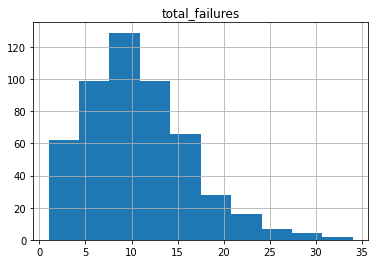

In [45]:
cpu_failures.hist()

In [48]:
#Outliers in this case is any core with a failure value greater than the 75th percentile
cpu_failures_outliers = cpu_failures[cpu_failures['total_failures'] > 14]

In [58]:
cpu_failures_outliers.shape

(123, 2)

# Jason --
    Question: 2   CMS Frequency of failure on particular nodes - user names: "cmslocal" and "cmspilot"

# Maggi -- 
    Question: 3 & 4   Calculation of % of actual memory used and mean % for each group